<a href="https://colab.research.google.com/github/thuBv-123/Bui-Vu-Anh-Thu--31241025695--LT0001/blob/main/Bai%2011.2%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
pip install scikit-fuzzy

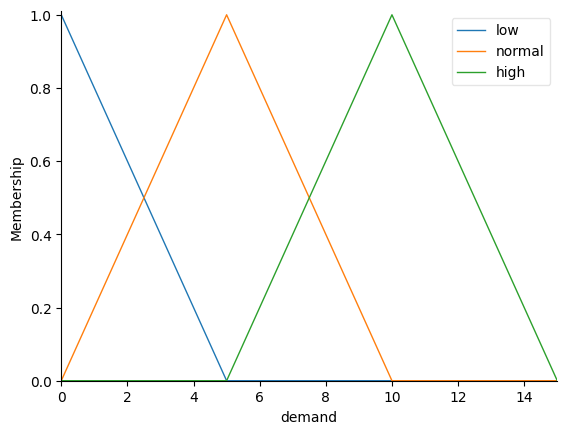

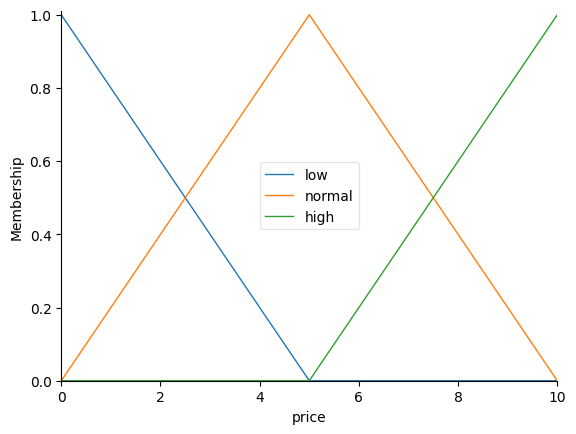

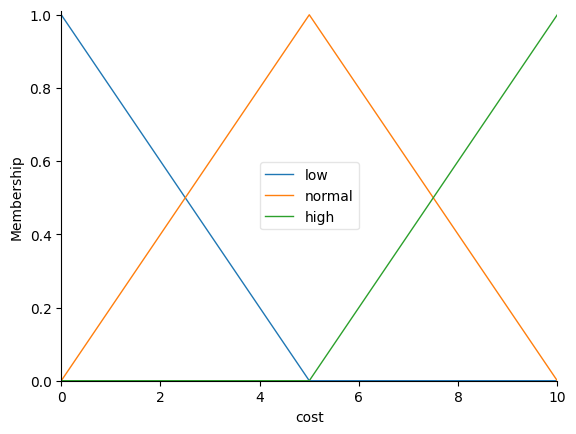

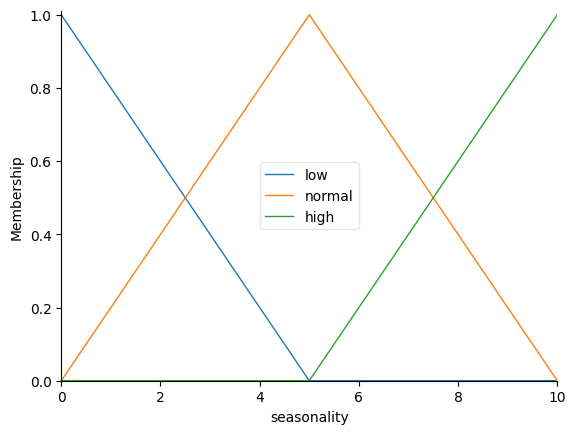

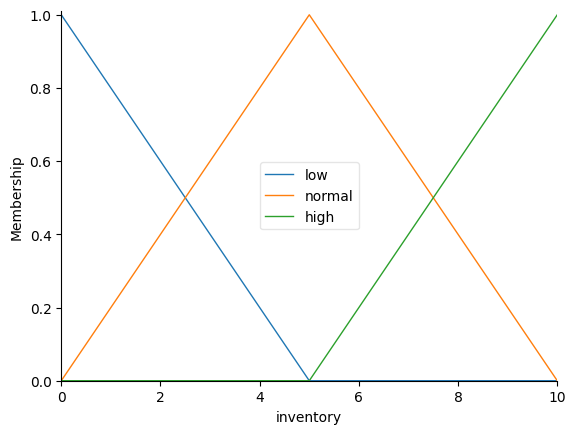

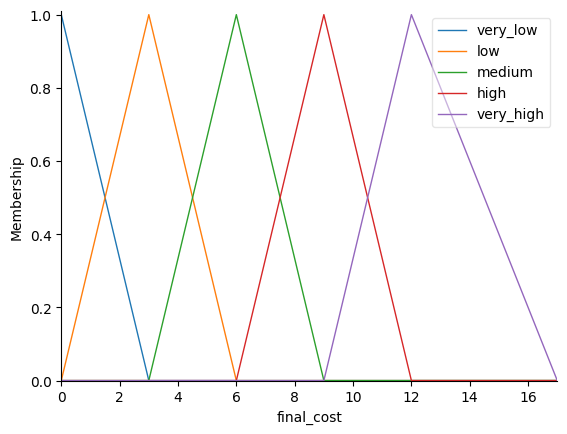

In [39]:
# exam 11

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


demand=ctrl.Antecedent(np.arange(0,15.1,0.1),'demand')
price=ctrl.Antecedent(np.arange(0,10.1,0.1),'price')
cost=ctrl.Antecedent(np.arange(0,10.1,0.1),'cost')
seasonality=ctrl.Antecedent(np.arange(0,10.1,0.1),'seasonality')
inventory=ctrl.Antecedent(np.arange(0,10.1,0.1),'inventory')
final_cost=ctrl.Consequent(np.arange(0,17.1,0.1),'final_cost')


demand['low']=fuzz.trimf(demand.universe,[0,0,5])
demand['normal']=fuzz.trimf(demand.universe,[0,5,10])
demand['high']=fuzz.trimf(demand.universe,[5,10,15])
price['low']=fuzz.trimf(price.universe,[0,0,5])
price['normal']=fuzz.trimf(price.universe,[0,5,10])
price['high']=fuzz.trimf(price.universe,[5,10,10])
cost['low']=fuzz.trimf(cost.universe,[0,0,5])
cost['normal']=fuzz.trimf(cost.universe,[0,5,10])
cost['high']=fuzz.trimf(cost.universe,[5,10,10])
seasonality['low']=fuzz.trimf(seasonality.universe,[0,0,5])
seasonality['normal']=fuzz.trimf(seasonality.universe,[0,5,10])
seasonality['high']=fuzz.trimf(seasonality.universe,[5,10,10])
inventory['low']=fuzz.trimf(inventory.universe,[0,0,5])
inventory['normal']=fuzz.trimf(inventory.universe,[0,5,10])
inventory['high']=fuzz.trimf(inventory.universe,[5,10,10])
final_cost['very_low']=fuzz.trimf(final_cost.universe,[0,0,3])
final_cost['low']=fuzz.trimf(final_cost.universe,[0,3,6])
final_cost['medium']=fuzz.trimf(final_cost.universe,[3,6,9])
final_cost['high']=fuzz.trimf(final_cost.universe,[6,9,12])
final_cost['very_high']=fuzz.trimf(final_cost.universe,[9,12,17])



demand.view()
price.view()
cost.view()
seasonality.view()
inventory.view()
final_cost.view()

7.22926829268292


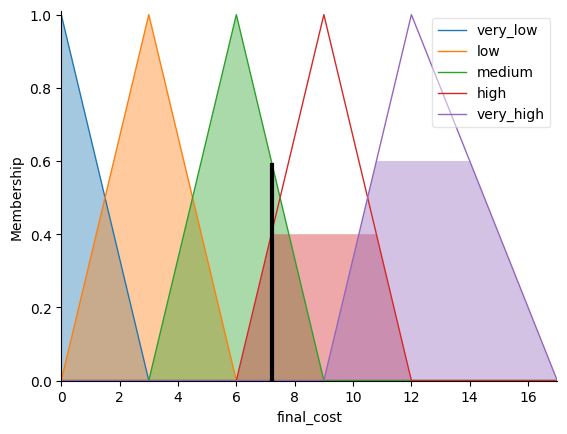

In [40]:
rule1=ctrl.Rule(demand['high']|price['high']|inventory['low'],final_cost['very_high'])
rule2=ctrl.Rule(demand['high']|seasonality['high']|inventory['low'],final_cost['high'])
rule3=ctrl.Rule(demand['normal']|cost['high']|inventory['low'],final_cost['very_high'])
rule4=ctrl.Rule(demand['high']|price['normal']|inventory['normal'],final_cost['high'])
rule5=ctrl.Rule(demand['normal']|price['normal']|inventory['low'],final_cost['high'])
rule6=ctrl.Rule(demand['normal']|seasonality['high']|inventory['normal'],final_cost['high'])
rule7=ctrl.Rule(demand['normal']|price['normal']|inventory['normal'],final_cost['medium'])
rule8=ctrl.Rule(demand['normal']|price['high']|inventory['normal'],final_cost['medium'])
rule9=ctrl.Rule(demand['low']|price['high']|inventory['normal'],final_cost['medium'])
rule10=ctrl.Rule(demand['normal']|cost['normal']|inventory['normal'],final_cost['medium'])
rule11=ctrl.Rule(demand['low']|price['low']|inventory['high'],final_cost['low'])
rule12=ctrl.Rule(demand['normal']|cost['normal']|inventory['high'],final_cost['low'])
rule13=ctrl.Rule(demand['low']|seasonality['low']|inventory['high'],final_cost['low'])
rule14=ctrl.Rule(demand['low']|price['low']|inventory['high'],final_cost['very_low'])
rule15=ctrl.Rule(demand['low']|seasonality['low']|inventory['high'],final_cost['very_low'])
rule16=ctrl.Rule(demand['normal']|price['low']|inventory['high'],final_cost['very_low'])


final_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16])
final=ctrl.ControlSystemSimulation(final_system)


final.input['demand']=0
final.input['price']=8
final.input['cost']=0
final.input['seasonality']=4
final.input['inventory']=10


final.compute()
print(final.output['final_cost'])
final_cost.view(sim=final)
